In [1]:
import pandas as pd
import numpy as np
from scipy import optimize


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit
from sklearn.preprocessing import PolynomialFeatures, FunctionTransformer
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer

from mlxtend.evaluate import bias_variance_decomp

import os
import warnings

In [2]:
path1 = '/datasets/data.csv'
path2 = '/datasets/prices_train.csv'
path3 = '/datasets/prices_test.csv'

def read_file(path, header='infer'):
    if os.path.exists(path):
        df = pd.read_csv(path, sep=',', header=header)
    elif os.path.exists(path[1:]):
        df = pd.read_csv(path[1:], sep=',', header=header)
    else:
        print('No such file or directory')
    return df

df_data        = read_file(path1, header=None)
df_price_train = read_file(path2)
df_price_test  = read_file(path3)

---

# Задание 1

За весь пункт 4 балла. Рассмотрим первый датасет. Пусть 1 столбец данных – х, 4 – y
- Обучите линейную регрессию. Предскажите значения для x=1,2,3
- Используя кросс-валидацию и среднеквадратичную функцию потерь, оцените точность и способность к генерализации у моделили
- Обучите полиномиальную регрессию, для кросс-валидации постройте график bias, variance в зависимости от степени полинома. Какая степень оптимальна? 
- Проведите подбор степени полинома с помощью любого из k-fold на 70% данных. Совпадают ли результаты? Оцените точность модели на оставшихся 30%. 


In [3]:
df_data.head()

,0,1,2,3
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375


In [4]:
df_data.isna().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [5]:
df_data.shape

(100, 4)

In [6]:
def choose_degree(X, y, cv, title=''):
    degrees = np.arange(2, 11)
    bias = []
    variance = []
    total_error = []

    for degree in degrees:
        poly_model = Pipeline(steps=[
            ('poly features', PolynomialFeatures(degree)),
            ('linear regression', LinearRegression())
        ])
        
        # poly_features = PolynomialFeatures(degree=degree)
        # X_poly = poly_features.fit_transform(X)
        scores = -cross_val_score(poly_model, X, y, cv=cv, scoring='neg_mean_squared_error')

        bias.append(np.mean(scores))
        variance.append(np.var(scores))
        total_error.append(bias[-1] ** 2 + variance[-1])

        # X_train, X_test, y_train, y_test = train_test_split(X, y,
        #                                             test_size=0.2,
        #                                             random_state=862,
        #                                             shuffle=True)
        # err_loc, bias_loc, var_loc = bias_variance_decomp(poly_model, X_train, y_train, X_test, y_test, loss='mse', random_seed=862)
        # bias.append(bias_loc)
        # variance.append(var_loc)
        # total_error.append(err_loc)
        

    plt.figure(figsize=(10, 6))
    # plt.plot(degrees, [b ** 2 for b in bias], 'o-', label='bias^2')
    plt.plot(degrees, bias, 'o-', label='bias^2')
    plt.plot(degrees, variance, '^-', label='variance')
    plt.plot(degrees, total_error, 's-', label='total error')
    if max(total_error) > 150:
        plt.ylim(-0.2, 100)
    plt.xlabel('Polynomial Degree')
    plt.ylabel('Error')
    plt.title('Bias-Variance Trade-off for ' + title)
    plt.legend()
    plt.show()

    optimal_degree = degrees[np.argmin(total_error)]
    print("Optimal polynomial degree:", optimal_degree)
    print('Best score: ', np.min(total_error))
    print('SCORES:', total_error)
    return optimal_degree

Predictions for x=1,2,3:  [ 3.88961228  1.85127565 -0.18706098]
Scores for feature 0:  [1.37032099 0.75592648 1.50856193 1.91093266 0.85126526]


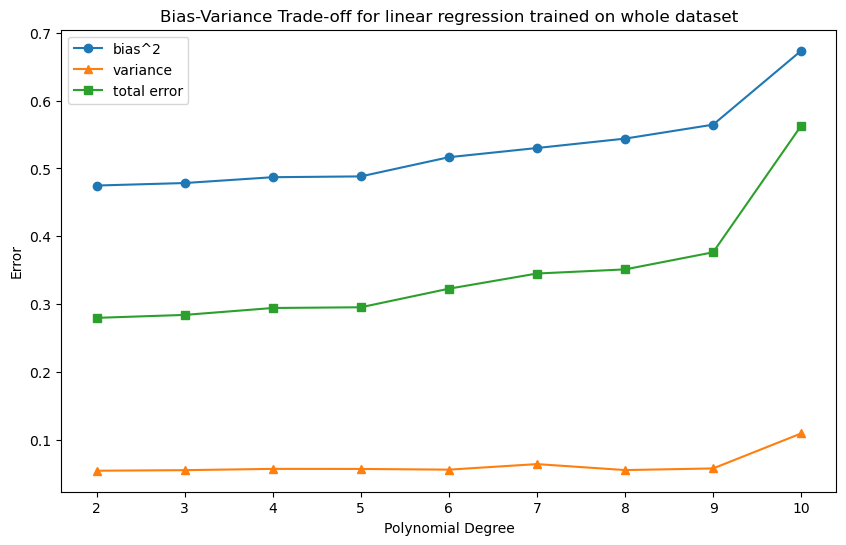

Optimal polynomial degree: 2
Best score:  0.2796666179410722
SCORES: [0.2796666179410722, 0.2840182550747665, 0.2942208177973234, 0.29528012560333367, 0.3226810932666643, 0.3450728150809284, 0.35115375069867577, 0.3763821410559126, 0.5631095936215328]
-------------------------------



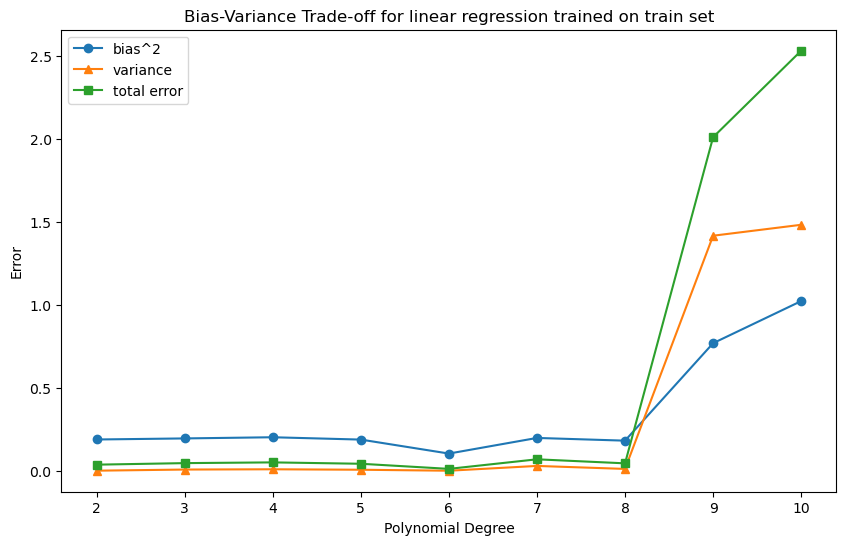

Optimal polynomial degree: 6
Best score:  0.013412524137160878
SCORES: [0.0387654459726503, 0.04804368277039295, 0.05248198110292338, 0.04419282104116607, 0.013412524137160878, 0.07101818713139825, 0.04671669560318421, 2.010831873987541, 2.531564257613317]
Best score of the model with best polynomial degree 6: 0.7173
--------------------------------------------------------------



--------------------------------------------------------------



Predictions for x=1,2,3:  [1.29366804 1.85127565 2.40888326]
Scores for feature 1:  [3.23239922 1.87435139 1.40823011 2.56471106 2.18057469]


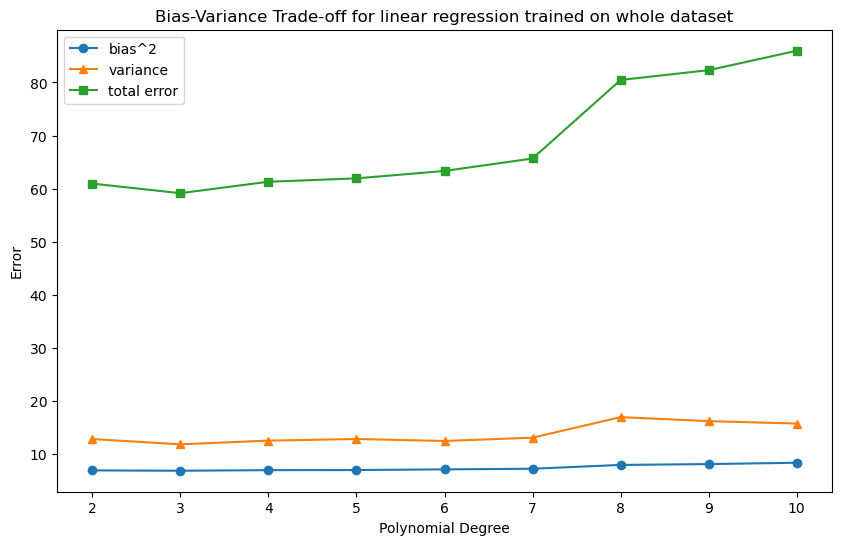

Optimal polynomial degree: 3
Best score:  59.153201933087175
SCORES: [60.95572206048243, 59.153201933087175, 61.30675355727703, 61.941941916931775, 63.34013787129496, 65.68833031348952, 80.48268103484143, 82.32163081813728, 85.9844422060859]
-------------------------------



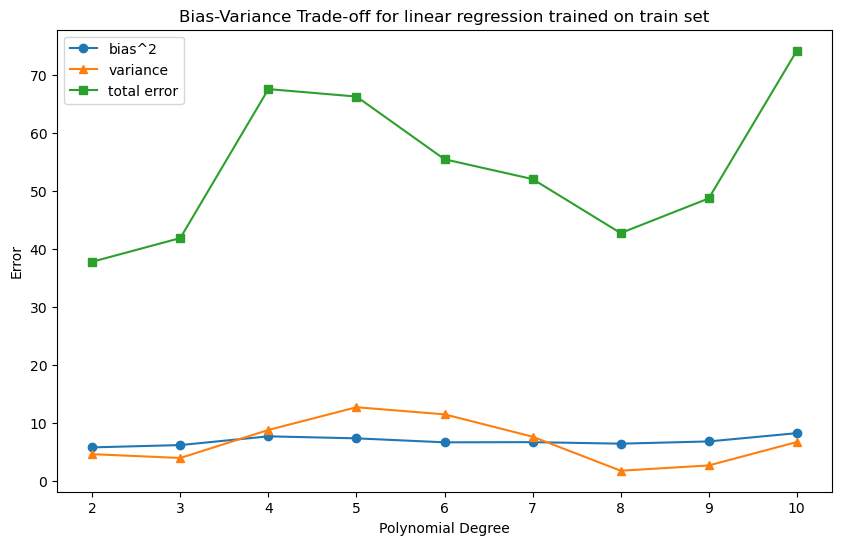

Optimal polynomial degree: 2
Best score:  37.80264073624289
SCORES: [37.80264073624289, 41.89027013687824, 67.60099220117337, 66.31433859690841, 55.49124068656438, 52.06850192138782, 42.74878347296159, 48.73415952002863, 74.2246502003537]
Best score of the model with best polynomial degree 2: 2.4201
--------------------------------------------------------------



--------------------------------------------------------------



Predictions for x=1,2,3:  [2.35093922 1.83045634 1.30997345]
Scores for feature 2:  [3.13370946 1.88841075 1.82218431 2.24157017 2.38779249]


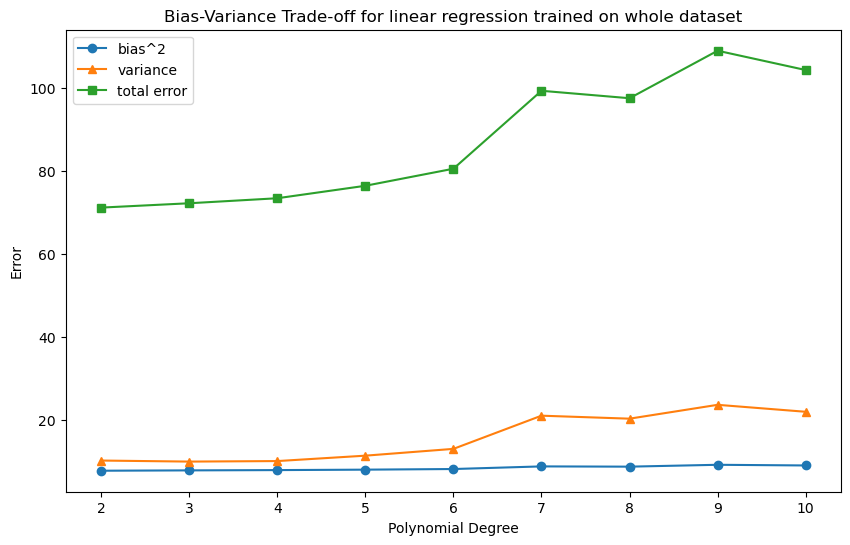

Optimal polynomial degree: 2
Best score:  71.18230120591141
SCORES: [71.18230120591141, 72.22764941013384, 73.43549314056975, 76.43753437828823, 80.544994322869, 99.31997586761935, 97.52686719915152, 108.96913513142756, 104.31771370636213]
-------------------------------



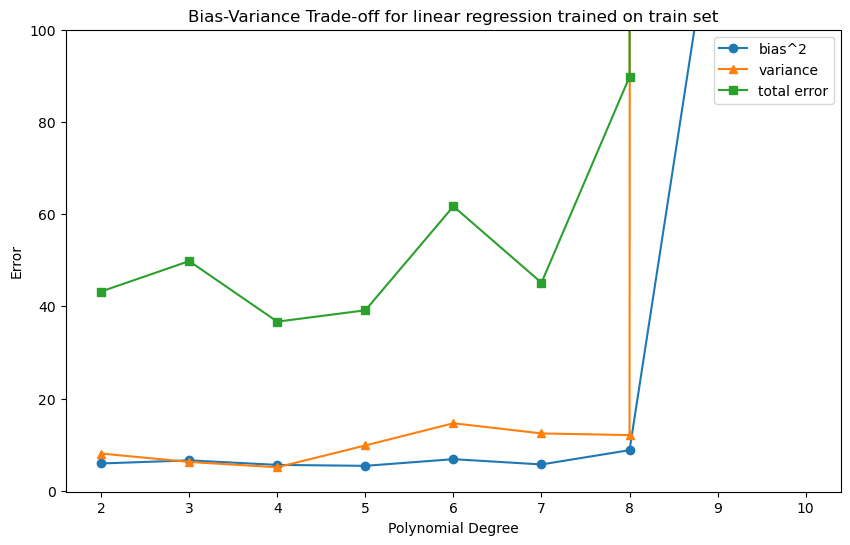

Optimal polynomial degree: 4
Best score:  36.683759476025955
SCORES: [43.22280274272298, 49.81593829137114, 36.683759476025955, 39.14855360448033, 61.694303841069924, 45.12660496148639, 89.78540804814035, 49526.33007604953, 505659.19880509924]
Best score of the model with best polynomial degree 4: 2.7519
--------------------------------------------------------------



--------------------------------------------------------------





In [7]:
lr_model = LinearRegression()

y = df_data.iloc[:, 3].values
cv = ShuffleSplit(n_splits=5, random_state=862)

for i in range(3):
    # Линейная регрессия
    X = df_data.iloc[:, i].values
    X = X.reshape(-1, 1)
    lr_model.fit(X, y)
    y_pred_123 = lr_model.predict([[1], [2], [3]])
    print('Predictions for x=1,2,3: ', y_pred_123)

    # Кросс-валидация
    score = -cross_val_score(lr_model, X, y, cv=cv, scoring='neg_mean_absolute_error')
    print(f'Scores for feature {i}: ', score)

    # Полиномиальная регрессия
    choose_degree(X, y, cv, title='linear regression trained on whole dataset')
    print('-------------------------------\n')

    # Подбор степени полинома с помощью кросс-валидации на подвыборке
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, shuffle=True, random_state=862)
    best_degree = choose_degree(X_train, y_train, cv, title='linear regression trained on train set')
    poly_model = Pipeline(steps=[
            ('poly features', PolynomialFeatures(best_degree)),
            ('linear regression', LinearRegression())
        ])
    poly_model.fit(X_train, y_train)
    score = mean_absolute_error(y_test, poly_model.predict(X_test))
    print(f'Best score of the model with best polynomial degree {best_degree}: {score:.4f}')
    print('--------------------------------------------------------------\n\n\n')
    print('--------------------------------------------------------------\n\n\n')

---

# Задание 2

- Повторите пункты a-d для трех входных переменных.

Scores for 3 features:  [1.20093348 0.83139991 1.15925011 1.70402073 0.68835657]


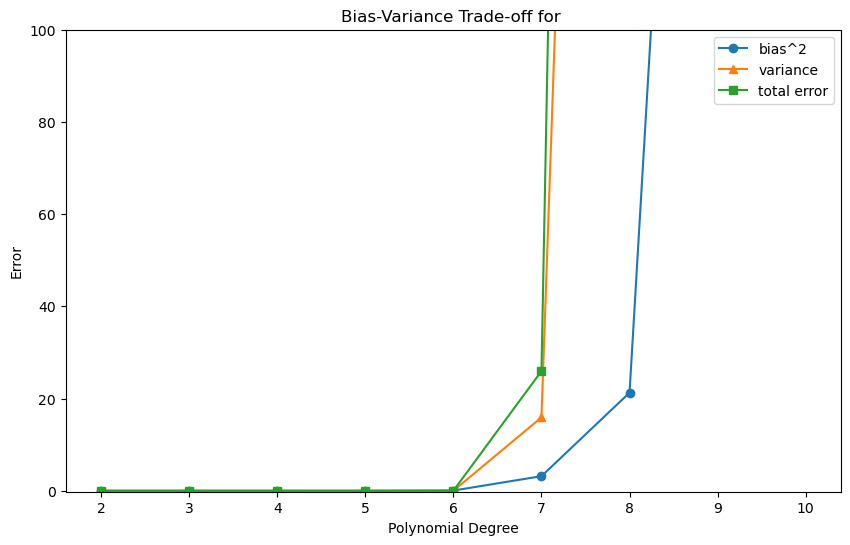

Optimal polynomial degree: 2
Best score:  3.911021990446093e-57
SCORES: [3.911021990446093e-57, 4.4640742555369065e-56, 3.955300863485532e-50, 6.185356613077856e-49, 0.01520335083642574, 25.966715034643812, 1015.8279908822152, 242593.23232978457, 130192593.19453841]
-------------------------------



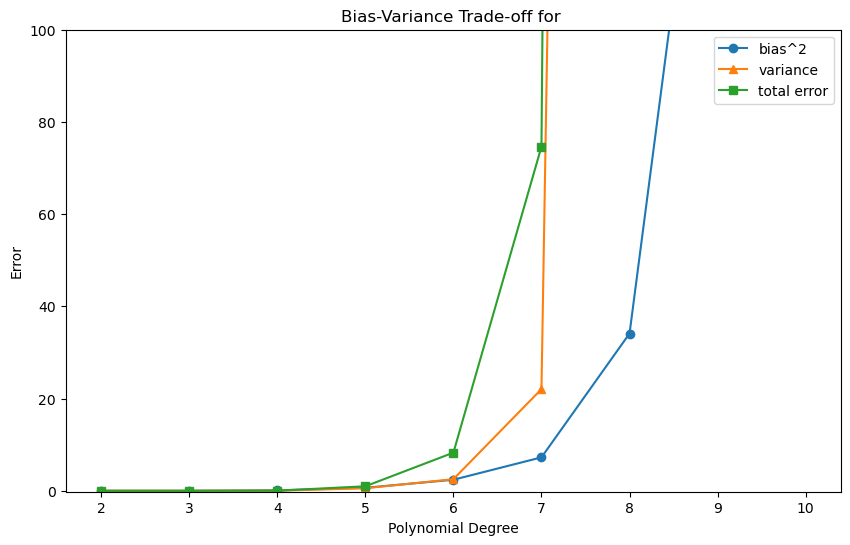

Optimal polynomial degree: 2
Best score:  1.926875435868019e-57
SCORES: [1.926875435868019e-57, 4.2687895780271174e-55, 0.024976868650421098, 0.978907132343215, 8.272633290582046, 74.64773472002577, 2334.563997936667, 55237.22045696834, 1138093.6069023157]
Best score of the model with best polynomial degree 2: 0.0000
--------------------------------------------------------------





In [8]:
# Линейная регрессия
X = df_data.iloc[:, :3].values
lr_model.fit(X, y)
score = -cross_val_score(lr_model, X, y, cv=cv, scoring='neg_mean_absolute_error')
print(f'Scores for 3 features: ', score)

# Полиномиальная регрессия
choose_degree(X, y, cv)
print('-------------------------------\n')

# Подбор степени полинома с помощью кросс-валидации на подвыборке
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, shuffle=True, random_state=862)
best_degree = choose_degree(X_train, y_train, cv)
poly_model = Pipeline(steps=[
        ('poly features', PolynomialFeatures(best_degree)),
        ('linear regression', LinearRegression())
    ])
poly_model.fit(X_train, y_train)
score = mean_absolute_error(y_test, poly_model.predict(X_test))
print(f'Best score of the model with best polynomial degree {best_degree}: {score:.4f}')
print('--------------------------------------------------------------\n\n\n')

---

# Задание 3

In [9]:
X = df_data.iloc[:, 0].values
X = X.reshape(-1, 1)
X[:5]

array([[0.        ],
       [0.04040404],
       [0.08080808],
       [0.12121212],
       [0.16161616]])

In [10]:
def basis_function(x, mu, sigma):
    return np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))

In [11]:
mu_values = np.linspace(X.min(), X.max(), num=10)

basis_transformer = FunctionTransformer(
    func=lambda X: np.array(
        [basis_function(x, mu_values, sigma=mu_values[1] - mu_values[0]) for x in X]), 
    validate=False)

preprocessor = ColumnTransformer(transformers=[('basis', basis_transformer, [0])])

gauss_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', LinearRegression())])

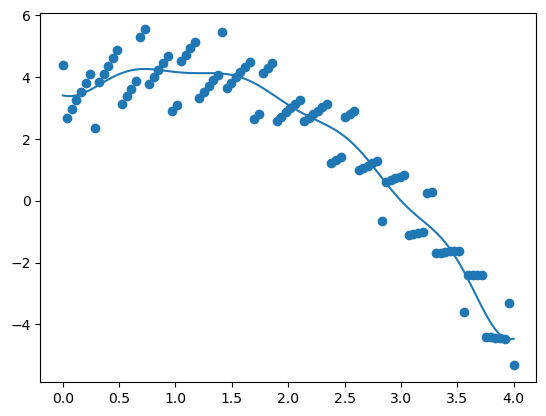

In [12]:
gauss_pipeline.fit(X, y)

X_plot = np.linspace(X.min(), X.max(), 100).reshape((-1, 1))
y_plot = gauss_pipeline.predict(X_plot)

plt.scatter(X, y)
plt.plot(X_plot, y_plot)
plt.show()

Трансформер через класс в соответствии со стилем sklearn.

In [33]:
class GaussianFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, N, width_factor=1.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        self.centers_ = np.linspace(-1, 1, self.N) # -1, 1
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)

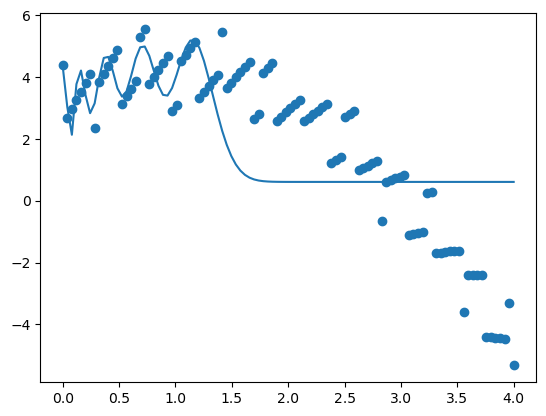

In [34]:
gauss_model = Pipeline(steps=[
    ('gaussian features', GaussianFeatures(10)),
    ('model', LinearRegression())
])
gauss_model.fit(X, y)
y_plot = gauss_model.predict(X_plot)

plt.scatter(X, y)
plt.plot(X_plot, y_plot)
plt.show()

In [15]:
# Кросс-валидация
score = -cross_val_score(gauss_model, X, y, cv=cv, scoring='neg_mean_absolute_error')
print(f'Scores for feature 1: ', score)

Scores for feature 1:  [0.85383517 0.41687269 0.60755307 0.67742279 0.71061359]


In [16]:
def choose_num_centers(X, y, cv):
    N = np.arange(2, 15)
    bias = []
    variance = []
    total_error = []

    for n in N:
        gauss_model = Pipeline(steps=[
            ('gaussian features', GaussianFeatures(n)),
            ('model', LinearRegression())
        ])

        scores = -cross_val_score(gauss_model, X, y, cv=cv, scoring='neg_mean_squared_error')
        bias.append(np.mean(scores))
        variance.append(np.var(scores))
        total_error.append(bias[-1] ** 2 + variance[-1])

    plt.figure(figsize=(10, 6))
    plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
    plt.plot(N, [b ** 2 for b in bias], label='bias^2')
    plt.plot(N, variance, label='variance')
    plt.plot(N, total_error, label='total error')
    if max(total_error) > 150:
        plt.ylim(-0.2, 3)
    plt.xlabel('Number of centers')
    plt.ylabel('Error')
    plt.title('Bias-Variance Trade-off')
    plt.legend()
    plt.show()

    optimal_degree = N[np.argmin(total_error)]
    print("Optimal number of uniformly spaced gaussian features:", optimal_degree, 'with score: ', np.min(total_error))
    return optimal_degree

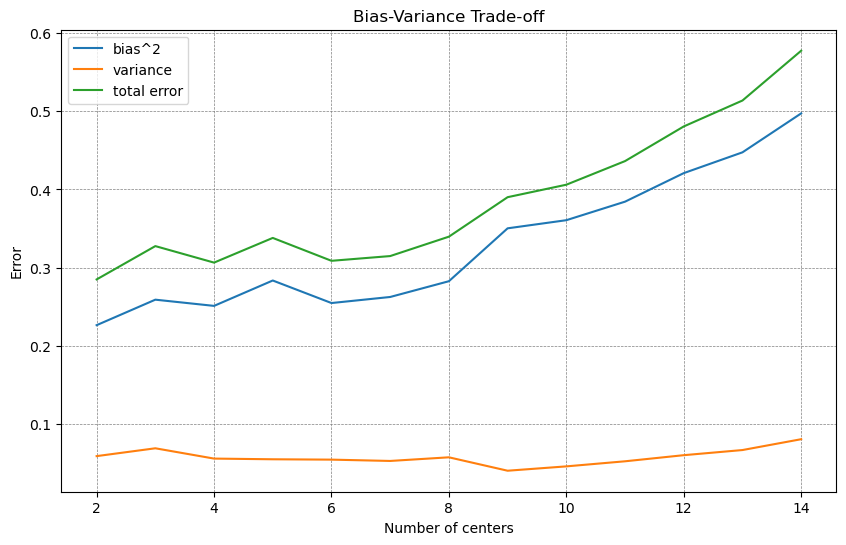

Optimal number of uniformly spaced gaussian features: 2 with score:  0.28479305927439635


2

In [17]:
choose_num_centers(X, y, cv)

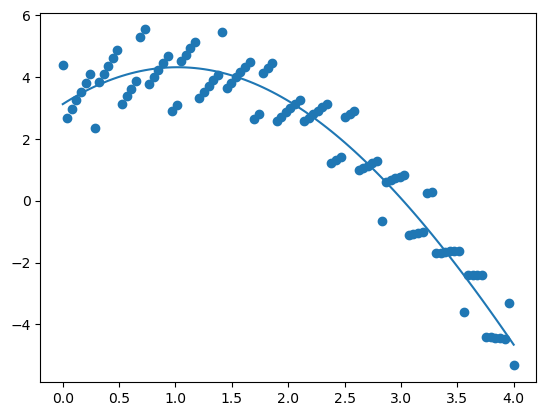

In [18]:
gauss_model = Pipeline(steps=[
    ('gaussian features', GaussianFeatures(2)),
    ('model', LinearRegression())
])
gauss_model.fit(X, y)
y_plot = gauss_model.predict(X_plot)

plt.scatter(X, y)
plt.plot(X_plot, y_plot)
plt.show()

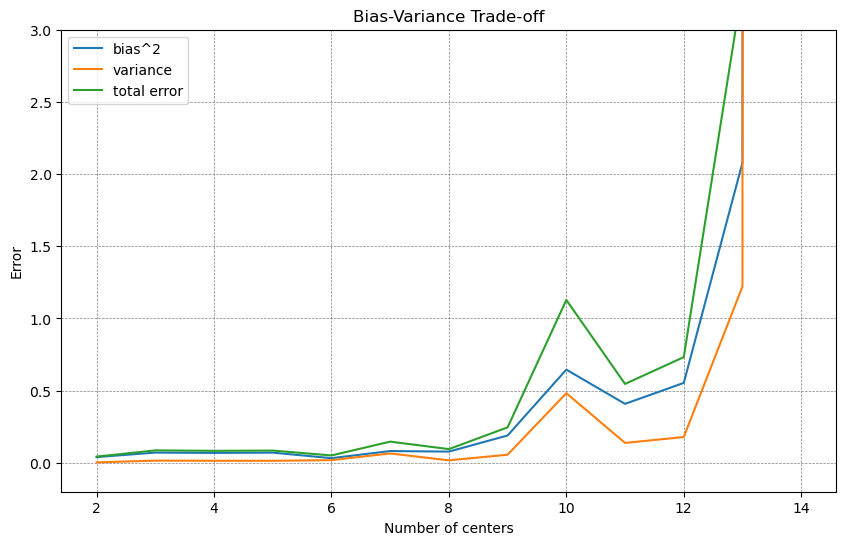

Optimal number of uniformly spaced gaussian features: 2 with score:  0.04318905870707792


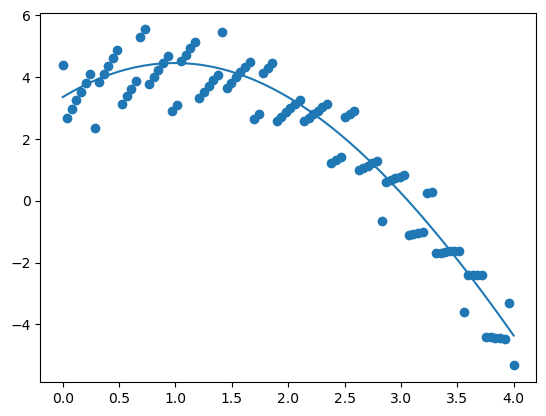

Best score of the model with best number of gaussian features (2): 0.6290


In [19]:
# Подбор степени полинома с помощью кросс-валидации на подвыборке
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, shuffle=True, random_state=862)

best_N = choose_num_centers(X_train, y_train, cv)
gauss_model = Pipeline(steps=[
    ('gaussian features', GaussianFeatures(best_N)),
    ('model', LinearRegression())
])
gauss_model.fit(X_train, y_train)
y_plot = gauss_model.predict(X_plot)

plt.scatter(X, y)
plt.plot(X_plot, y_plot)
plt.show()

score = mean_absolute_error(y_test, gauss_model.predict(X_test))
print(f'Best score of the model with best number of gaussian features ({best_N}): {score:.4f}')

---

# Задание 4

Предположим, что $\epsilon_1..\epsilon_k$ независимы и одинаково распределены в соответствии с распределением Лапласа (а не в соответствии с $N(0,\sigma^2)$). То есть каждый $\epsilon_i\sim Laplace(0,b)=\frac{1}{2b}\exp{\left(-\frac{|\epsilon_i|}{b}\right)}$

- Приведите функцию потерь $J_{Laplace}(\beta)$, минимизация которой эквивалентна нахождению MLE для $\beta$ в рамках вышеуказанной модели шума. Объясните эквивалентность. 1 балл
- Как вы думаете, почему приведенная выше модель обеспечивает более надежное соответствие данным по сравнению со стандартной моделью, предполагающей гауссово распределение шумовых членов? 1 балл

#### a)

Для нахождения максимального правдоподобия (MLE) параметра $\beta$ в модели с шумом, распределённым по закону Лапласа, нужно найти такую $\beta$, которая максимизирует функцию правдоподобия.

Рассмотрим модель: $y_i = x_i^\top \beta + \epsilon_i$, где $\epsilon_i$ распределены по закону Лапласа с параметром $b$. Соответствующая функция плотности распределения следующая: $f(\epsilon_i) = \frac{1}{2b} \exp\left(-\frac{|\epsilon_i|}{b}\right)$.


Подставляя в функцию плотности оишбку, получим: $f(y_i - x_i^\top \beta) = \frac{1}{2b} \exp\left(-\frac{|y_i - x_i^\top \beta|}{b}\right).
$

Т.к. ошибки независимы (по регрессионному предположению), совместная плотность для всех наблюдений $(y_1, ... , y_n)$ будет произведением индивидуальных плотностей: $L(\beta) = \prod_{i=1}^k \frac{1}{2b} \exp\left(-\frac{|y_i - x_i^\top \beta|}{b}\right)$.


Логарифмическая функция правдоподобия будет следующей: $\log L(\beta) = \sum_{i=1}^k \log \left( \frac{1}{2b} \exp\left(-\frac{|y_i - x_i^\top \beta|}{b}\right) \right) = \sum_{i=1}^k \left( \log \left( \frac{1}{2b} \right) - \frac{|y_i - x_i^\top \beta|}{b} \right) =  \log L(\beta) = \sum_{i=1}^k \log \left( \frac{1}{2b} \right) - \frac{1}{b} \sum_{i=1}^k |y_i - x_i^\top \beta| = - n \ln(2b) - \frac{1}{b} \sum_{i=1}^k |y_i - x_i^\top \beta|
$


Т.к. $n \ln(2b)$ не зависит от $\beta$, при максимизации правдоподобия его можно не учитывать. То же касается и константы $\frac{1}{b}$. Тогда MLE упрощается до минимизации данного выражения: $\sum_{i=1}^k |y_i - x_i^\top \beta|$

Минимизация данного выражения соответствует минимизации функции потерь: $J_{Laplace}(\beta) = \sum_{i=1}^k |y_i - x_i^\top \beta|$

Итого, задача минимизации функции потерь $J_{Laplace}(\beta)$ соответствует/эквивалентна нахождению MLE для $\beta$ в рамках рамках рассматриваемой модели шума.

#### b)

Распределение Лапласа более устойчиво (робастно) к выбросам, чем нормальное распределение. Модель с шумом, распределенным по Лапласу, более надежно аппроксимирует данные, содержащие выбросы, т.к. имеет более тяжелые хвосты по сравнению с гауссовским, т.е. оно приписывает больше вероятностные массы экстремальным значениям. Это позволяет ему обрабатывать различные аномальные наблюдения в данных. Кроме того, в случае неоднородности дисперсии ошибок распределение Лапласа справляется лучше с моделированием ошибок, чем стандартное гауссовское распределение.

---

# Задание 5

ЛР с ошибками по Лапласу не имеет решения в аналитическом виде, поэтому может потребоваться итерационное решение.

In [20]:
# Реализация через численные методы
class LaplaceLinearRegressor():
    def __init__(self, w=None):
        self.w = w

    def fit(self, X, y):        
        if len(X.shape) == 1:
            X_ = X.reshape(-1,1)
        else:
            X_ = X

        initial_weights = np.ones(X_.shape[1]+1)
        res = optimize.minimize(
            self.__JLaplace, initial_weights,
            args=(X_, y),
            method='L-BFGS-B')

        if not res.success:
            warnings.warn(str(res), category=RuntimeWarning)
            raise Exception("scipy.optimize.minimize() didn't converge in LaplaceLinearRegressor.fit()")
        self.w = res.x

    def predict(self, X):
        if self.w is None:
            raise Exception(("This LaplaceLinearRegressor instance is not fitted yet."))
        return self.w[0] + np.matmul(X, self.w[1:])

    def get_params(self, deep=True):
        return {'w': self.w}


    def set_params():
        raise("Not implemented")


    def __JLaplace(self, w, x, y, b=1):
        y_pred = w[0] + np.matmul(x, w[1:])

        return np.mean(np.fabs(y - y_pred))

In [21]:
llr = LaplaceLinearRegressor()
llr.fit(X, y)

lr  = LinearRegression()
lr.fit(X, y)

LinearRegression()

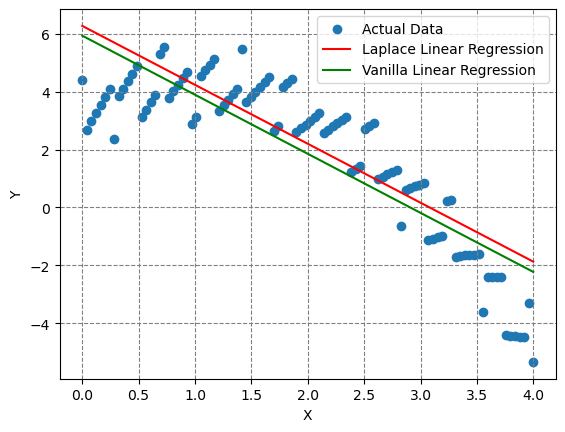

Laplace linear regression's MAE scorer: 1.166807090741106
Default linear regression's MAE scorer: 1.1843636029057458


In [22]:
y_llr_plot = llr.predict(X_plot)
y_lr_plot  = lr.predict(X_plot)

plt.scatter(X, y, label='Actual Data')
plt.plot(X_plot, y_llr_plot, color='red', label='Laplace Linear Regression')
plt.plot(X_plot, y_lr_plot, color='green', label='Vanilla Linear Regression')
plt.legend()

plt.grid(color='grey', linestyle='--')

plt.xlabel('X')
plt.ylabel('Y')

plt.show()

llr_score = mean_absolute_error(y, llr.predict(X))
lr_score  = mean_absolute_error(y, lr.predict(X))

print(f"Laplace linear regression's MAE scorer: {llr_score}")
print(f"Default linear regression's MAE scorer: {lr_score}")

In [23]:
llr_scores = -cross_val_score(llr, X, y, cv=cv, scoring='neg_mean_absolute_error')
lr_scores  = -cross_val_score(lr,  X, y, cv=cv, scoring='neg_mean_absolute_error')

print(f'Mean MAE for Laplace linear regression: {np.mean(llr_scores):.4f}')
print(f'Mean MAE for Vanilla linear regression: {np.mean(lr_scores):.4f}')

Mean MAE for Laplace linear regression: 1.3524
Mean MAE for Vanilla linear regression: 1.2794


In [24]:
# Реализация через численные методы
class LaplaceLinearRegressorGD():
    def __init__(self, learning_rate=0.001, num_iterations=50000, w=None):
        self.w = w
        self.learning_rate  = learning_rate
        self.num_iterations = num_iterations

    def fit(self, X, y):        
        if len(X.shape) == 1:
            X_ = X.reshape(-1,1)
        else:
            X_ = X

        X_ = np.column_stack((np.ones(len(X_)), X_))
        self.w = np.ones(X_.shape[1]) # initial_weights
        
        for _ in range(self.num_iterations):
            self.w -= self.learning_rate * self.__grad_JLaplace(X_, y)

    def predict(self, X):
        if self.w is None:
            raise Exception(("This LaplaceLinearRegressor instance is not fitted yet."))
        if self.w.shape[0] > X.shape[1]:
            X_ = np.column_stack((np.ones(len(X)), X))
        else:
            X_ = X
        return np.matmul(X_, self.w)

    def __grad_JLaplace(self, X, y, b=1):
        # Субградиент функции потерь
        y_pred = self.predict(X)
        subgradient = np.sign(y_pred - y)
        # Градиент функции потерь
        gradient = np.sum(subgradient.reshape(y.shape[0], 1) * X, axis=0) / y.shape[0]
        return gradient

    def get_params(self, deep=True):
        return {'w': self.w}


    def set_params():
        raise("Not implemented")

In [25]:
llr_grad = LaplaceLinearRegressorGD()
llr_grad.fit(X, y)

In [26]:
llr_grad.get_params()

{'w': array([ 5.8456    , -1.85305697])}

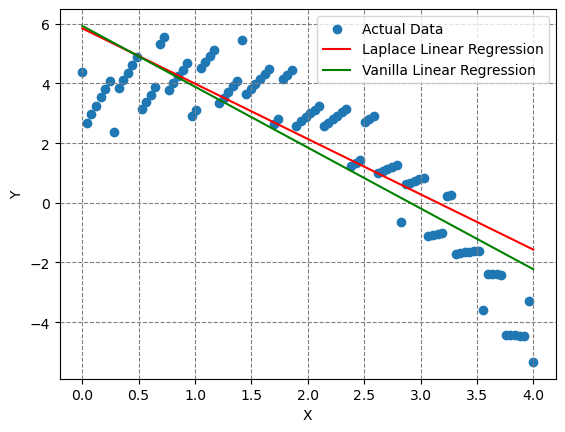

Laplace linear regression's MAE scorer: 1.1669533097439042
Default linear regression's MAE scorer: 1.1843636029057458


In [27]:
y_llr_grad_plot = llr_grad.predict(X_plot)

plt.scatter(X, y, label='Actual Data')
plt.plot(X_plot, y_llr_grad_plot, color='red', label='Laplace Linear Regression')
plt.plot(X_plot, y_lr_plot, color='green', label='Vanilla Linear Regression')
plt.legend()

plt.grid(color='grey', linestyle='--')

plt.xlabel('X')
plt.ylabel('Y')

plt.show()

llr_grad_score = mean_absolute_error(y, llr_grad.predict(X))

print(f"Laplace linear regression's MAE scorer: {llr_grad_score}")
print(f"Default linear regression's MAE scorer: {lr_score}")

In [28]:
llr_grad_scores = -cross_val_score(llr_grad, X, y, cv=cv, scoring='neg_mean_absolute_error')

print(f'Mean MAE for Laplace linear regression: {np.mean(llr_grad_scores):.4f}')
print(f'Mean MAE for Vanilla linear regression: {np.mean(lr_scores):.4f}')

Mean MAE for Laplace linear regression: 1.2933
Mean MAE for Vanilla linear regression: 1.2794


https://stackoverflow.com/questions/71534025/how-mae-loss-is-optimized-with-sgd-optimizer-in-sklearn

https://github.com/scikit-learn/scikit-learn/blob/main/sklearn/linear_model/_sgd_fast.pyx.tp

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html

In [29]:
llr_sgd = SGDRegressor(loss='epsilon_insensitive', penalty=None, max_iter=1000, verbose=0, epsilon=0.1,
                       random_state=862, learning_rate='constant', eta0=0.001, n_iter_no_change=50) # learning_rate='invscaling', eta=0.01
# При n_iter_no_change=10 не сошелся к оптимальному

In [30]:
llr_sgd.fit(X, y)

SGDRegressor(eta0=0.001, learning_rate='constant', loss='epsilon_insensitive',
             n_iter_no_change=50, penalty=None, random_state=862)

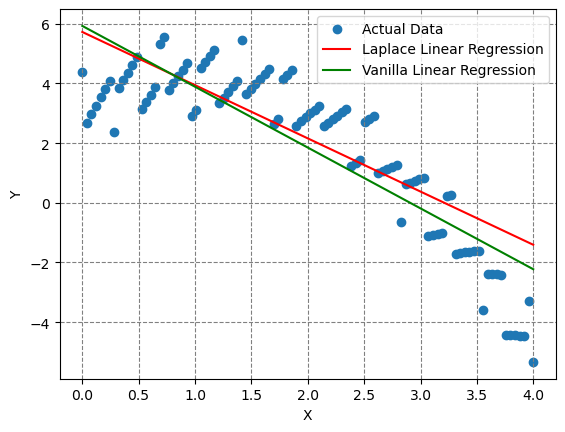

Laplace linear regression's MAE scorer: 1.1696651347953901
Default linear regression's MAE scorer: 1.1843636029057458


In [31]:
y_llr_sgd_plot = llr_sgd.predict(X_plot)

plt.scatter(X, y, label='Actual Data')
plt.plot(X_plot, y_llr_sgd_plot, color='red', label='Laplace Linear Regression')
plt.plot(X_plot, y_lr_plot, color='green', label='Vanilla Linear Regression')
plt.legend()

plt.grid(color='grey', linestyle='--')

plt.xlabel('X')
plt.ylabel('Y')

plt.show()

llr_sgd_score = mean_absolute_error(y, llr_sgd.predict(X))

print(f"Laplace linear regression's MAE scorer: {llr_sgd_score}")
print(f"Default linear regression's MAE scorer: {lr_score}")

In [32]:
llr_sgd_scores = -cross_val_score(llr_sgd, X, y, cv=cv, scoring='neg_mean_absolute_error')

print(f'Mean MAE for Laplace linear regression: {np.mean(llr_sgd_scores):.4f}')
print(f'Mean MAE for Vanilla linear regression: {np.mean(lr_scores):.4f}')

Mean MAE for Laplace linear regression: 1.2378
Mean MAE for Vanilla linear regression: 1.2794
